In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("../../Hi-C-embedding/GraphEmbedding")
sys.path.append("../../utilities/")
import data_utils
from ge.models import deepwalk, line, sdne
import networkx as nx
from sklearn.manifold import TSNE

In [3]:
contact_list = data_utils.create_contact_list("../../data", 'GM12878', 'chr21', 'chr21', 100000)
uni_contact_list = data_utils.uni_dir(contact_list)
bi_contact_list = data_utils.bi_dir(contact_list)
full_contact_list = data_utils.loop_bi_dir(contact_list)

../../utilities/data_utils.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  contact_list.sort_values(['id1','id2'], inplace = True)


In [3]:
m = data_utils.create_matrix("../../data", 'GM12878', 'chr21', 'chr21', 100000)

<AxesSubplot:>

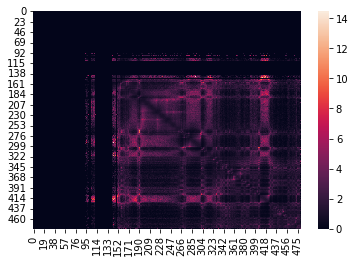

In [13]:
uni_G = nx.from_pandas_edgelist(uni_contact_list, 'id1', 'id2', edge_attr = 'weight', create_using=nx.DiGraph())
bi_G = nx.from_pandas_edgelist(bi_contact_list, 'id1', 'id2', edge_attr = 'weight', create_using=nx.DiGraph())
full_G = nx.from_pandas_edgelist(full_contact_list, 'id1', 'id2', edge_attr = 'weight', create_using=nx.DiGraph())

In [6]:
uni_G = nx.read_edgelist('chr21_unidirectional.txt',create_using=nx.DiGraph(),delimiter = "\t",
                         nodetype = int, data=(("weight", float),))#read graph

'\nbi_G = nx.read_edgelist(\'bidirectional.txt\',create_using=nx.DiGraph(),delimiter = "\t",\n                         nodetype = int, data=(("weight", float),))#read graph\n                         \nbi_loop_G = nx.read_edgelist(\'bidirectional_loops.txt\',create_using=nx.DiGraph(),delimiter = "\t",\n                         nodetype = int, data=(("weight", float),))#read graph\n'

In [18]:
###LINE###
model = line.LINE(uni_G,embedding_size=128,order='second') #init model,order can be ['first','second','all']
model.train(batch_size=1024,epochs=15,verbose=2)# train model
embeddings = model.get_embeddings()# get embedding vectors

Epoch 1/15
1s - loss: 15.7909
Epoch 2/15
1s - loss: 4.0527
Epoch 3/15
1s - loss: 1.2482
Epoch 4/15
1s - loss: 0.7767
Epoch 5/15
1s - loss: 0.5812
Epoch 6/15
1s - loss: 0.4485
Epoch 7/15
1s - loss: 0.3910
Epoch 8/15
1s - loss: 0.3686
Epoch 9/15
1s - loss: 0.3585
Epoch 10/15
1s - loss: 0.3520
Epoch 11/15
1s - loss: 0.3469
Epoch 12/15
1s - loss: 0.3425
Epoch 13/15
1s - loss: 0.3386
Epoch 14/15
1s - loss: 0.3355
Epoch 15/15
1s - loss: 0.3325


<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

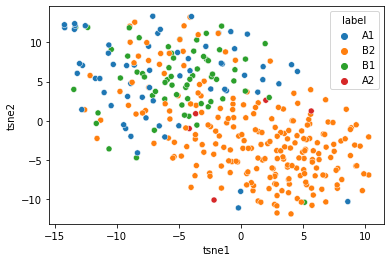

In [24]:
line_uni_emb = data_utils.make_embedding_df(embeddings,"../../data",'GM12878',100000)
line_uni_tsne_comps = TSNE(n_components=2,init='random').fit_transform(line_uni_emb.iloc[:,2:])
line_uni_emb['tsne1'] = line_uni_tsne_comps[:,0]
line_uni_emb['tsne2'] = line_uni_tsne_comps[:,1]
line_uni_emb = pd.merge(line_uni_emb, SC_annot, on = ['pos','chr_name'], how = 'inner')
sns.scatterplot(data=line_uni_emb, x = 'tsne1', y = 'tsne2', hue = 'label')

In [25]:
###LINE###
bi_line_model = line.LINE(bi_G,embedding_size=128,order='second') #init model,order can be ['first','second','all']
bi_line_model.train(batch_size=1024,epochs=15,verbose=2)# train model
bi_line_embeddings = bi_line_model.get_embeddings()# get embedding vectors

Epoch 1/15
2s - loss: 9.9182
Epoch 2/15
2s - loss: 1.0589
Epoch 3/15
2s - loss: 0.5975
Epoch 4/15
2s - loss: 0.4886
Epoch 5/15
2s - loss: 0.4760
Epoch 6/15
3s - loss: 0.4679
Epoch 7/15
3s - loss: 0.4659
Epoch 8/15
3s - loss: 0.4625
Epoch 9/15
3s - loss: 0.4598
Epoch 10/15
2s - loss: 0.4580
Epoch 11/15
3s - loss: 0.4564
Epoch 12/15
2s - loss: 0.4530
Epoch 13/15
3s - loss: 0.4544
Epoch 14/15
3s - loss: 0.4536
Epoch 15/15
2s - loss: 0.4531


<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

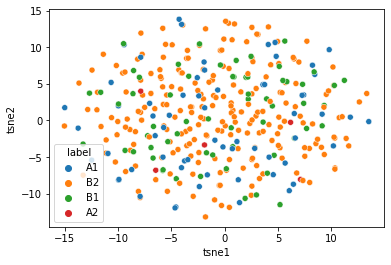

In [26]:
line_bi_emb = data_utils.make_embedding_df(bi_line_embeddings,"../../data",'GM12878',100000)
line_bi_tsne_comps = TSNE(n_components=2,init='random').fit_transform(line_bi_emb.iloc[:,2:])
line_bi_emb['tsne1'] = line_bi_tsne_comps[:,0]
line_bi_emb['tsne2'] = line_bi_tsne_comps[:,1]
line_bi_emb = pd.merge(line_bi_emb, SC_annot, on = ['pos','chr_name'], how = 'inner')
sns.scatterplot(data=line_bi_emb, x = 'tsne1', y = 'tsne2', hue = 'label')

In [14]:
###here the batch size is greater than node size however in genome wide...
uni_sdne_model = sdne.SDNE(uni_G,hidden_size=[256,128]) #init model
uni_sdne_model.train(batch_size=100,epochs=40,verbose=2)# train model
uni_sdne_embeddings = uni_sdne_model.get_embeddings()# get embedding vectors

Epoch 1/40
0s - loss:  13532.2362 - 2nd_loss:  13531.7924 - 1st_loss:  0.1469
Epoch 2/40
0s - loss:  10058.5868 - 2nd_loss:  10057.9348 - 1st_loss:  0.3561
Epoch 3/40
0s - loss:  8080.4230 - 2nd_loss:  8079.8122 - 1st_loss:  0.3165
Epoch 4/40
0s - loss:  6839.6552 - 2nd_loss:  6839.0164 - 1st_loss:  0.3460
Epoch 5/40
0s - loss:  6002.8132 - 2nd_loss:  6002.2023 - 1st_loss:  0.3196
Epoch 6/40
0s - loss:  5415.6524 - 2nd_loss:  5415.0369 - 1st_loss:  0.3248
Epoch 7/40
0s - loss:  4956.1027 - 2nd_loss:  4955.5018 - 1st_loss:  0.3105
Epoch 8/40
0s - loss:  4622.8132 - 2nd_loss:  4622.2169 - 1st_loss:  0.3062
Epoch 9/40
0s - loss:  4357.3817 - 2nd_loss:  4356.7838 - 1st_loss:  0.3084
Epoch 10/40
0s - loss:  4131.8461 - 2nd_loss:  4131.2480 - 1st_loss:  0.3092
Epoch 11/40
0s - loss:  3965.3076 - 2nd_loss:  3964.7103 - 1st_loss:  0.3091
Epoch 12/40
0s - loss:  3841.1930 - 2nd_loss:  3840.5901 - 1st_loss:  0.3147
Epoch 13/40
0s - loss:  3750.0982 - 2nd_loss:  3749.5008 - 1st_loss:  0.3093
Epoc

In [6]:
###here the batch size is greater than node size however in genome wide...
bi_sdne_model = sdne.SDNE(bi_G,hidden_size=[256,128]) #init model
bi_sdne_model.train(batch_size=100,epochs=40,verbose=2)# train model
bi_sdne_embeddings = bi_sdne_model.get_embeddings()# get embedding vectors

Epoch 1/40
0s - loss:  24599.9993 - 2nd_loss:  24598.6545 - 1st_loss:  1.0459
Epoch 2/40
0s - loss:  17857.2358 - 2nd_loss:  17855.2336 - 1st_loss:  1.7062
Epoch 3/40
0s - loss:  14773.7188 - 2nd_loss:  14772.2764 - 1st_loss:  1.1491
Epoch 4/40
0s - loss:  12944.3134 - 2nd_loss:  12942.7521 - 1st_loss:  1.2712
Epoch 5/40
0s - loss:  11306.5029 - 2nd_loss:  11305.1351 - 1st_loss:  1.0790
Epoch 6/40
0s - loss:  10109.9597 - 2nd_loss:  10108.5972 - 1st_loss:  1.0755
Epoch 7/40
0s - loss:  9298.6097 - 2nd_loss:  9297.2983 - 1st_loss:  1.0264
Epoch 8/40
0s - loss:  8735.3541 - 2nd_loss:  8734.1274 - 1st_loss:  0.9421
Epoch 9/40
0s - loss:  8319.1339 - 2nd_loss:  8317.9270 - 1st_loss:  0.9231
Epoch 10/40
0s - loss:  8002.8120 - 2nd_loss:  8001.6680 - 1st_loss:  0.8618
Epoch 11/40
0s - loss:  7736.8180 - 2nd_loss:  7735.6655 - 1st_loss:  0.8722
Epoch 12/40
0s - loss:  7484.0718 - 2nd_loss:  7482.9606 - 1st_loss:  0.8316
Epoch 13/40
0s - loss:  7241.7100 - 2nd_loss:  7240.5667 - 1st_loss:  0.8

In [7]:
###here the batch size is greater than node size however in genome wide...
full_sdne_model = sdne.SDNE(full_G,hidden_size=[256,128]) #init model
full_sdne_model.train(batch_size=100,epochs=40,verbose=2)# train model
full_sdne_embeddings = full_sdne_model.get_embeddings()# get embedding vectors

Epoch 1/40
0s - loss:  24152.3354 - 2nd_loss:  24151.2197 - 1st_loss:  0.8162
Epoch 2/40
0s - loss:  17101.8010 - 2nd_loss:  17100.1218 - 1st_loss:  1.3837
Epoch 3/40
0s - loss:  14002.8708 - 2nd_loss:  14001.5317 - 1st_loss:  1.0464
Epoch 4/40
0s - loss:  12356.9662 - 2nd_loss:  12355.6183 - 1st_loss:  1.0571
Epoch 5/40
0s - loss:  11047.6838 - 2nd_loss:  11046.4834 - 1st_loss:  0.9116
Epoch 6/40
0s - loss:  9902.0317 - 2nd_loss:  9900.8130 - 1st_loss:  0.9301
Epoch 7/40
0s - loss:  9051.8018 - 2nd_loss:  9050.6716 - 1st_loss:  0.8447
Epoch 8/40
0s - loss:  8504.8392 - 2nd_loss:  8503.7001 - 1st_loss:  0.8557
Epoch 9/40
0s - loss:  8119.9590 - 2nd_loss:  8118.9022 - 1st_loss:  0.7736
Epoch 10/40
0s - loss:  7819.2183 - 2nd_loss:  7818.1459 - 1st_loss:  0.7896
Epoch 11/40
0s - loss:  7584.5400 - 2nd_loss:  7583.5170 - 1st_loss:  0.7415
Epoch 12/40
0s - loss:  7427.2972 - 2nd_loss:  7426.2408 - 1st_loss:  0.7756
Epoch 13/40
0s - loss:  7262.9243 - 2nd_loss:  7261.9209 - 1st_loss:  0.723

In [15]:
uni_emb = data_utils.make_embedding_df(uni_sdne_embeddings,"../../data",'GM12878',100000)
#bi_emb = data_utils.make_embedding_df(bi_sdne_embeddings,"../../data",'GM12878',100000)
#full_emb = data_utils.make_embedding_df(full_sdne_embeddings,"../../data",'GM12878',100000)

In [17]:
uni_tsne_comps = TSNE(n_components=2,init='random').fit_transform(uni_emb.iloc[:,2:])
uni_emb['tsne1'] = uni_tsne_comps[:,0]
uni_emb['tsne2'] = uni_tsne_comps[:,1]
'''
bi_tsne_comps = TSNE(n_components=2,init='random').fit_transform(bi_emb.iloc[:,2:])
bi_emb['tsne1'] = bi_tsne_comps[:,0]
bi_emb['tsne2'] = bi_tsne_comps[:,1]

full_tsne_comps = TSNE(n_components=2,init='random').fit_transform(full_emb.iloc[:,2:])
full_emb['tsne1'] = full_tsne_comps[:,0]
full_emb['tsne2'] = full_tsne_comps[:,1]
'''

"\nbi_tsne_comps = TSNE(n_components=2,init='random').fit_transform(bi_emb.iloc[:,2:])\nbi_emb['tsne1'] = bi_tsne_comps[:,0]\nbi_emb['tsne2'] = bi_tsne_comps[:,1]\n\nfull_tsne_comps = TSNE(n_components=2,init='random').fit_transform(full_emb.iloc[:,2:])\nfull_emb['tsne1'] = full_tsne_comps[:,0]\nfull_emb['tsne2'] = full_tsne_comps[:,1]\n"

In [18]:
SC_annot = data_utils.read_annot_file('../../data/annotations/GSE63525_GM12878_subcompartments.bed', 0, 100000)
SC_annot = data_utils.melt_annotation(SC_annot)
uni_emb = pd.merge(uni_emb, SC_annot, on = ['pos','chr_name'], how = 'inner')
#bi_emb = pd.merge(bi_emb, SC_annot, on = ['pos','chr_name'], how = 'inner')
#full_emb = pd.merge(full_emb, SC_annot, on = ['pos','chr_name'], how = 'inner')

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

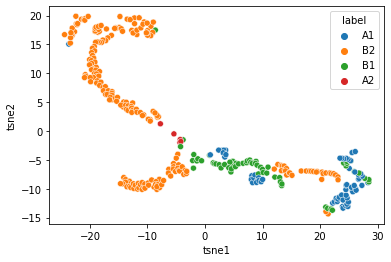

In [20]:
sns.scatterplot(data=uni_emb, x = 'tsne1', y = 'tsne2', hue = 'label')

In [3]:
resolution = 100000

In [5]:
looplist = pd.read_csv("../../data/annotations/GSE63525_GM12878_primary+replicate_HiCCUPS_looplist.txt", sep = "\t")
TADs = pd.read_csv("../../data/annotations/GSE63525_GM12878_primary+replicate_Arrowhead_domainlist.txt", sep = "\t")

In [6]:
chr21_loops = looplist[looplist['chr1']=='21']
chr21_loops.sort_values(['x1','y1'], inplace = True)
chr21_TADs = TADs[TADs['chr1']=='21']
chr21_TADs.sort_values(['x1'], inplace = True)
chr21_TADs['start'] = [int(p/resolution) for p in chr21_TADs['x1']]
chr21_TADs['end'] = [int(p/resolution) for p in chr21_TADs['x2']]

/home/nedooshki/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/nedooshki/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/nedooshki/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/nedooshki/.local/l

In [7]:
chr21_TADs

,chr1,x1,x2,chr2,y1,y2,color,f1,f2,f3,f4,f5,start,end
4681,21,15405000,15490000,21,15405000,15490000,"255,255,0",0.79076,0.080294,0.047062,0.51058,0.58836,154,154
4728,21,15630000,15755000,21,15630000,15755000,"255,255,0",0.94046,0.037630,0.028523,0.59615,0.69872,156,157
4684,21,15805000,16145000,21,15805000,16145000,"255,255,0",1.69970,0.070137,0.054687,0.94204,0.84948,158,161
4744,21,15815000,15895000,21,15815000,15895000,"255,255,0",0.93398,0.041393,0.012211,0.67188,0.51562,158,158
4732,21,15895000,16060000,21,15895000,16060000,"255,255,0",0.74652,0.032932,0.030537,0.51838,0.51838,158,160
4760,21,16155000,16230000,21,16155000,16230000,"255,255,0",0.71186,0.009854,0.021484,0.51786,0.51786,161,162
4678,21,16235000,16440000,21,16235000,16440000,"255,255,0",0.80403,0.052258,0.082219,0.58571,0.61429,162,164
4724,21,16360000,16440000,21,16360000,16440000,"255,255,0",0.84959,0.035273,0.032744,0.54688,0.60938,163,164
4683,21,16445000,16880000,21,16445000,16880000,"255,255,0",0.99053,0.063339,0.061700,0.52907,0.72040,164,168
4700,21,17095000,17275000,21,17095000,17275000,"255,255,0",1.18390,0.048062,0.050687,0.62541,0.81803,170,172


<AxesSubplot:>

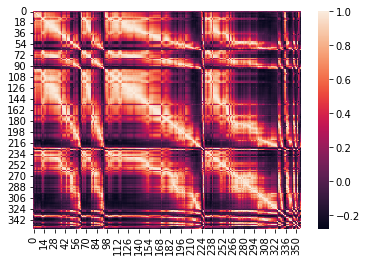

In [73]:
sns.heatmap(np.corrcoef(sdne_emb.iloc[:,0:128]))

In [24]:
from scipy.spatial.distance import cdist
emb_names = ['emb'+str(e) for e in np.arange(1,129)]
cdists = pd.DataFrame(cdist(uni_emb.loc[:,emb_names],uni_emb.loc[:,emb_names]), 
                      columns = uni_emb['pos'], 
                      index = uni_emb['pos'])

In [8]:
def TAD_enrichment(start_pos, end_pos):
    TAD_length = end_pos - start_pos
    within_dists = cdists.loc[start_pos:end_pos , start_pos:end_pos]
    down_stream_dists = cdists.loc[start_pos-TAD_length:start_pos , start_pos-TAD_length:start_pos]
    up_stream_dists = cdists.loc[end_pos:end_pos+TAD_length , end_pos:end_pos+TAD_length]
    within_dists = within_dists[within_dists!=0].stack().mean()
    down_stream_dists = down_stream_dists[down_stream_dists!=0].stack().mean()
    up_stream_dists = up_stream_dists[up_stream_dists!=0].stack().mean()
    print(within_dists, down_stream_dists, up_stream_dists)

In [31]:
print(TAD_enrichment(281,301))
print(TAD_enrichment(262,264))
print(TAD_enrichment(262,267))

5.04915788362523 9.436658163301116 9.765463841708105
None
2.1951884939101656 2.552853273386392 3.5902736363268453
None
3.851598627352411 2.7683312728588545 7.660133638873469
None


/home/nedooshki/miniconda3/envs/embedding/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


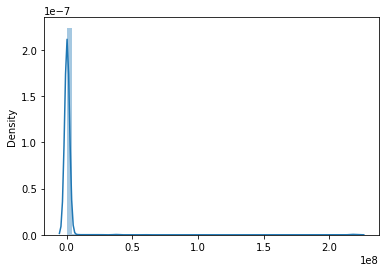

In [42]:
ax = sns.distplot((looplist['centroid2'] - looplist['centroid1']))
#ax.set_xscale('log')

In [45]:
loops_length = looplist['centroid2'] - looplist['centroid1']

/home/nedooshki/miniconda3/envs/embedding/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

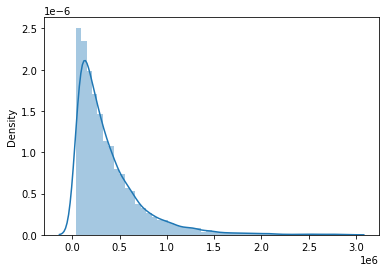

In [47]:
sns.distplot(loops_length[loops_length<3000000])

/home/nedooshki/miniconda3/envs/embedding/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

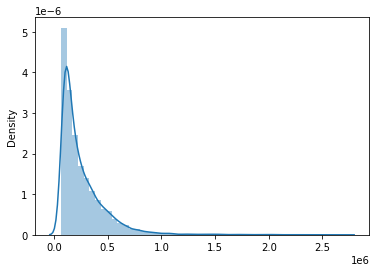

In [40]:
sns.distplot(TADs['x2']-TADs['x1'])

In [43]:
print(np.mean(TADs['x2']-TADs['x1']))

258279.05973689887


In [44]:
print(np.mean(looplist['centroid2'] - looplist['centroid1']))

1173886.192104149
